# House Prices

In [1]:
import os
import sys
import re
import yaml

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Import my own functions

In [2]:
sys.path.insert(0, os.path.abspath("../src"))
import lib.cleaning as clean

#### Load yaml configs

In [3]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

#### We want to see all the columns

In [4]:
pd.set_option('display.max_columns', None)

### Read cleaned data

In [5]:
data = pd.read_csv(config['data']['csv_clean'])
data.head(3)

,total_price,base_price,m2,m2_price,service_charge,heating_costs,thermal_charge,pricetrend,has_balcony,has_cellar,has_kitchen,has_lift,has_garden,pets_allowed,condition,type_of_flat,interior_qual,energy_efficiency_class,telekom_upload_speed,no_park_spaces,heating_type,firing_types,newly_const,no_rooms,floor,year_constructed,last_refurbish,date,picturecount,regio1,regio2,regio3,address,plz
0,840,595,86.00,6.92,245,-1.00,181.4,4.62,0,1,0,0,1,unknown,well_kept,ground floor,normal,unknown,10.0,1,central_heating,oil,0,4.0,1,1965,-1,May19,6,Nordrhein-Westfalen,Dortmund,Schüren,"Schüruferstraße 244, 44269 Dortmund",44269
1,934,800,89.00,8.99,134,-1.00,-1.0,3.47,1,0,0,0,0,no,refurbished,ground floor,normal,unknown,10.0,2,self_contained_central_heating,gas,0,3.0,unknown,1871,2019,May19,8,Rheinland-Pfalz,Rhein Pfalz Kreis,Böhl Iggelheim,67459 Böhl Iggelheim,67459
2,401,343,58.15,5.90,58,87.23,86.0,1.53,1,0,0,0,0,unknown,unknown,other,unknown,unknown,40.0,-1,district_heating,district_heating,0,3.0,3,1964,-1,May19,9,Sachsen,Mittelsachsen Kreis,Freiberg,"Glück-Auf-Straße 35, 9599 Freiberg",9599


In [6]:
sns.set_theme()

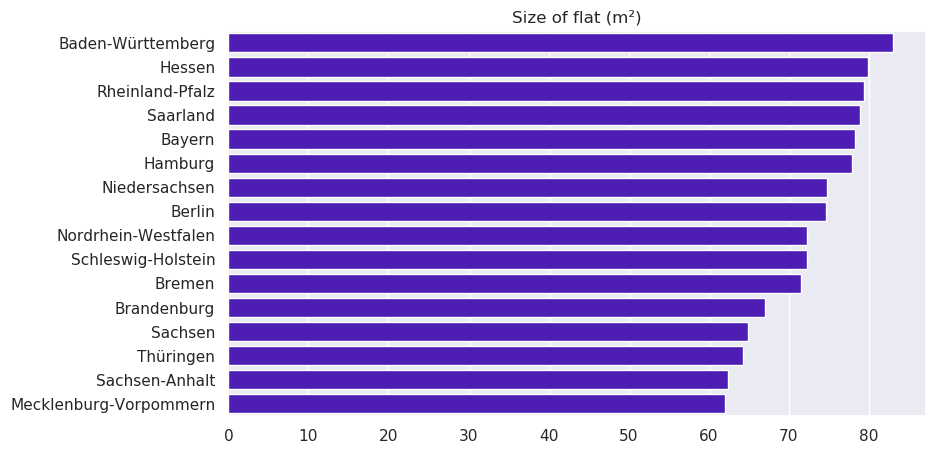

In [7]:
grp = data.groupby('regio1').agg({'m2':'mean'}).reset_index().sort_values(by='m2', ascending=False)

fig,ax = plt.subplots(figsize=(9, 5))
sx = sns.barplot(data=grp, x='m2', y='regio1', color='#4505cd')
sx.set(title='Size of flat (m²)', ylabel='', xlabel='')
plt.show()

In average Baden Württemberg has the biggest flats (~85m²) and Sachsen Anhalt the smallest (~64m²).

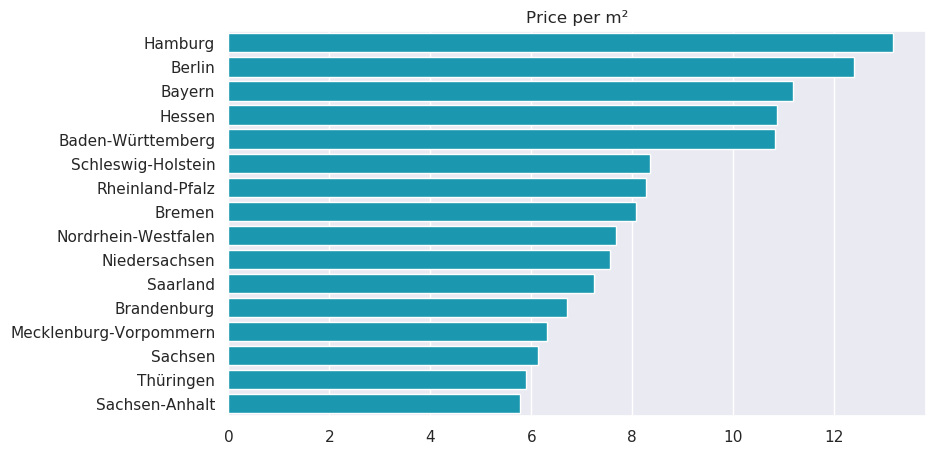

In [8]:
grp = data.groupby('regio1').agg({'m2_price':'mean'}).reset_index().sort_values(by='m2_price', ascending=False)

fig,ax = plt.subplots(figsize=(9, 5))
sx = sns.barplot(data=grp, x='m2_price', y='regio1', color='#03a9c7')
sx.set(title='Price per m²', ylabel='', xlabel='')
plt.show()

Like expected, Hamburg, Berlin and Bayern having the highest prices per m².<br>
The cheapest ones can be seen in the former DDR regions Sachsen Anhalt, Thüringen and Sachsen.

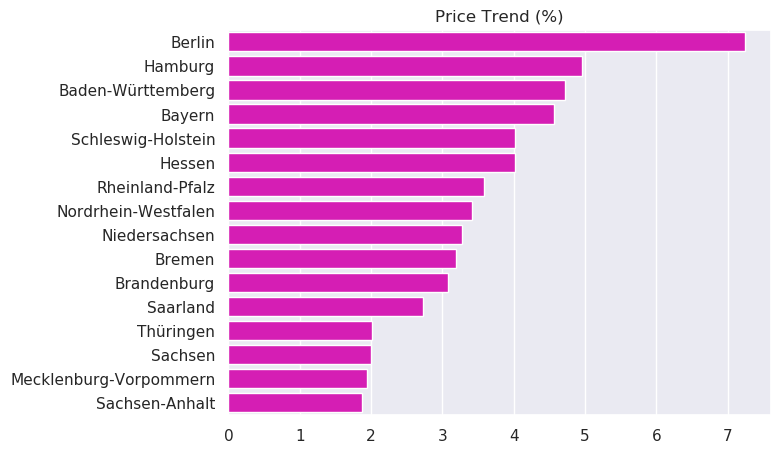

In [9]:
grp = data.groupby('regio1').agg({'pricetrend':'mean'}).reset_index().sort_values(by='pricetrend', ascending=False)

fig,ax = plt.subplots(figsize=(7, 5))
sx = sns.barplot(data=grp, x='pricetrend', y='regio1', color='#f300c7')
sx.set(title='Price Trend (%)', ylabel='', xlabel='')
plt.show()

In [10]:
corr = data.select_dtypes(np.number).corr()

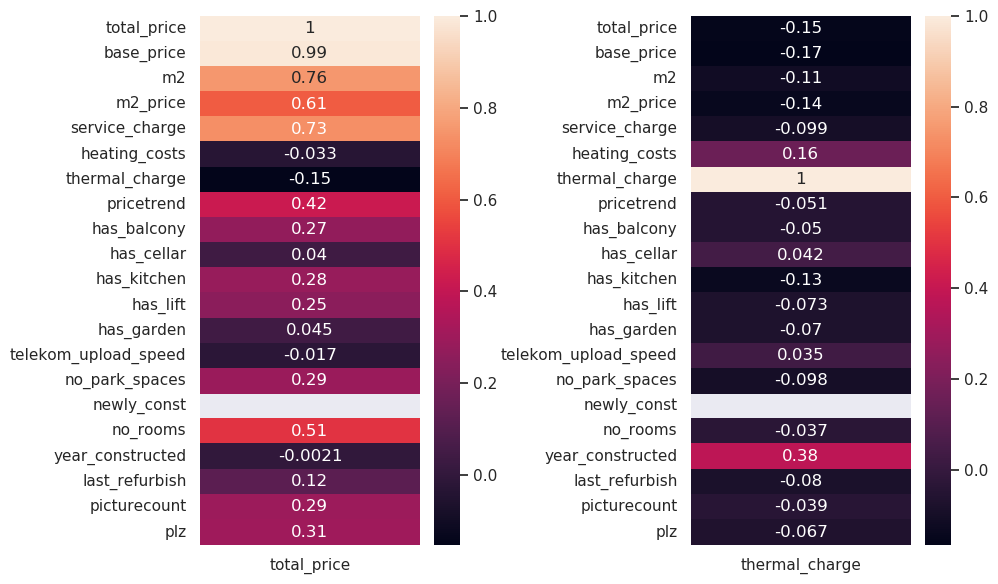

In [11]:
fig,ax = plt.subplots(1,2, figsize=(10,6))
sns.heatmap(corr[['total_price']], annot=True, ax=ax[0])
sns.heatmap(corr[['thermal_charge']], annot=True, ax=ax[1])
#sns.scatterplot(data=data, y='total_price')
plt.tight_layout()
plt.show()
#plt.xticks(rotation=45)

In [12]:
d2 = data[['regio1','total_price', 'base_price', 'm2',
           'm2_price', 'service_charge', 'pricetrend']]

In [13]:
bland = d2.groupby('regio1').agg('mean').reset_index()

#### Read shapefile for plotting a map of germany

In [14]:
geo = gpd.read_file('../data/shapes/vg2500_bld.shp')
#geo2 = gpd.read_file('../data/shapes/vg2500_krs.shp')

array(['Hamburg', 'Niedersachsen', 'Bremen', 'Nordrhein-Westfalen',
       'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern',
       'Saarland', 'Berlin', 'Brandenburg', 'Mecklenburg-Vorpommern',
       'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'Schleswig-Holstein'],
      dtype=object)

In [16]:
geo = pd.merge(left=geo, right=bland, left_on='GEN', right_on='regio1')

In [25]:
def plot_map(geo, col, title='', cmap=None, ax=None):
    gx = geo.plot(col, cmap=cmap, ax=ax, legend=True)
    gx.set_xticks([])
    gx.set_yticks([])
    gx.set(title=title)

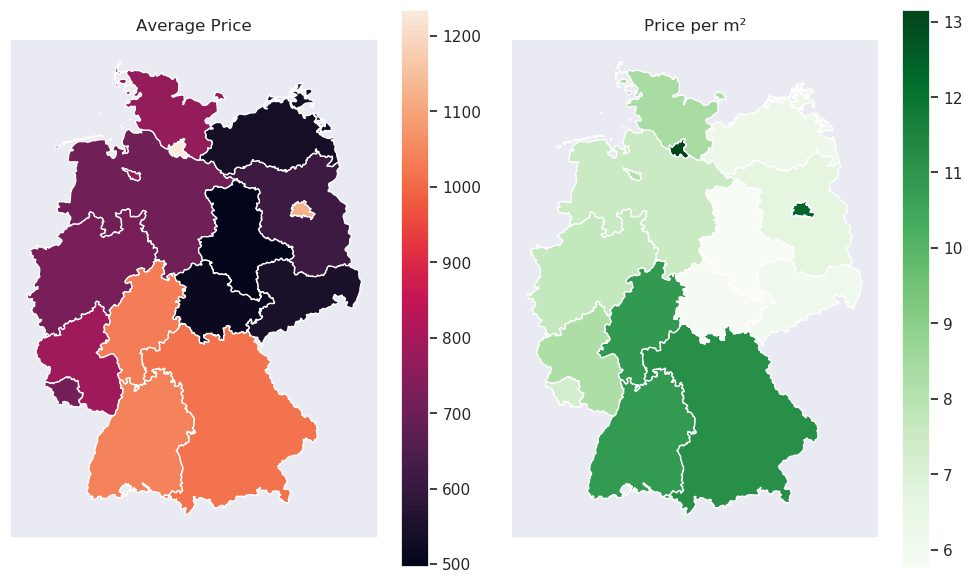

In [31]:
fig,ax = plt.subplots(1, 2, figsize=(10,6))
plot_map(geo, 'total_price', 'Average Price', ax=ax[0])
plot_map(geo, 'm2_price', 'Price per m²', cmap='Greens', ax=ax[1])
plt.tight_layout()
plt.show()

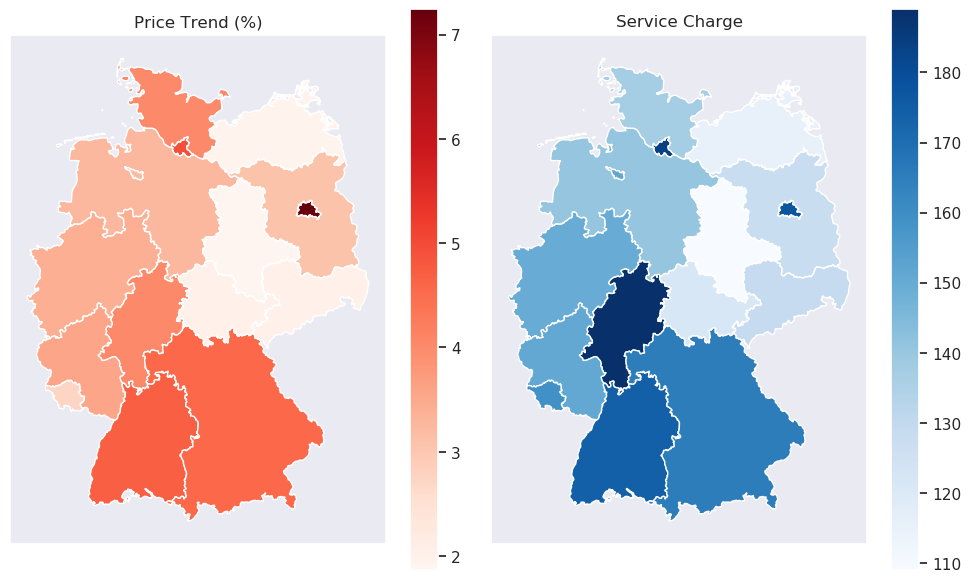

In [33]:
fig,ax = plt.subplots(1, 2, figsize=(10,6))
plot_map(geo, 'pricetrend', 'Price Trend (%)', ax=ax[0], cmap='Reds')
plot_map(geo, 'service_charge', 'Service Charge', cmap='Blues', ax=ax[1])
plt.tight_layout()
plt.show()